# Comparison of Classification Algorithms for Binary Classification Problems

## Heart Failure Prediction

#### Link to Dataset: https://archive-beta.ics.uci.edu/dataset/519/heart+failure+clinical+records

The Lifecycle of the project will have following steps:

1. <b>Objective</b>: The objective of this project is to evaluate and compare the important metrics of classification algorithms viz. Logistic Regression, K-Nearest Neighbors, Support Vector Classifiers, Decision Trees and Random Forest. We will test the Accuracy, Precision, Recall and F1 Score of all these algorithms.

2. <b>Data Collection</b>: The data is taken from UCI ML Repository.

    This dataset contains the medical records of 299 patients who had heart failure, collected during their follow-up period, where each patient profile has 13 clinical features.

    Features꞉
    - age꞉ age of the patient (years)
    - anaemia꞉ decrease of red blood cells or hemoglobin (boolean)
    - high blood pressure꞉ if the patient has hypertension (boolean)
    - creatinine phosphokinase (CPK)꞉ level of the CPK enzyme in the blood (mcg/L)
    - diabetes꞉ if the patient has diabetes (boolean)
    - ejection fraction꞉ percentage of blood leaving the heart at each contraction (percentage)
    - platelets꞉ platelets in the blood (kiloplatelets/mL)
    - sex꞉ Male=1 or Female=0 (binary)
    - serum creatinine꞉ level of serum creatinine in the blood (mg/dL)
    - serum sodium꞉ level of serum sodium in the blood (mEq/L)
    - smoking꞉ if the patient smokes or not 1=yes or 0=no (boolean)
    - time꞉ follow‑up period (days)
    - death event꞉ if the patient deceased during the follow‑up period (boolean)

3. <b>Exploratory Data Analysis</b>: In this step we will analyse the dependent and independent variables, check the relationship between the variables by plotting histplots and bar charts. We will also check for inconsistencies in data or null values if any.

4. <b>Model Selection</b>: As this is a classification task, we will be working with classification algorithms such as Logistic Regression, K-Nearest Neighbors, Support Vector Classifier, Decision Tree Classifier and Random Forest Classifier. 

5. <b>Model Training</b>: We will be training the model across all the 5 algorithms and evaluate the metrics of each model.

6. <b>Hyperparameter Tuning</b>: We will perform Hyperparameter tuning to optimize the performance of the models by selecting the best combination of hyperparameters.

7. <b>Evaluating Model Performance</b>: We will use the metrics Accuracy, Precision, Recall and F1 Score to compare the performance of each model and select the best model for our problem.

## Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

## Importing the Dataset

In [2]:
dataset_link = 'https://raw.githubusercontent.com/grvnair/heart-failure-prediction/main/heart_failure_clinical_records_dataset.csv'

df = pd.read_csv(dataset_link)

## Analysing the Data

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
# Checking the number of rows and columns
df.shape

(299, 13)

In [5]:
# Checking null values
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [8]:
# Value Counts for Deceased Patients

df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

1 signifies deceased and 0 signifies not deceased

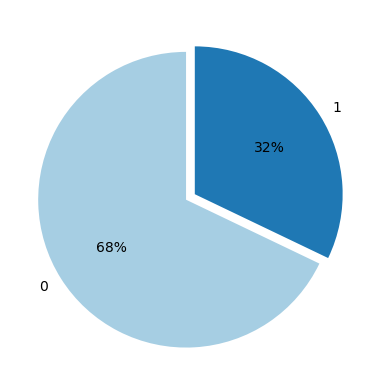

In [9]:
plt.pie(df['DEATH_EVENT'].value_counts(), labels=[0, 1], colors=sns.color_palette('Paired'), 
        autopct='%.0f%%', startangle=90, explode=[0.07, 0])

plt.show()

In [10]:
list_col = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

for col in list_col:
    print("Value counts for {} : \n{} \n".format(col.upper(), df[col].value_counts()))

Value counts for ANAEMIA : 
0    170
1    129
Name: anaemia, dtype: int64 

Value counts for DIABETES : 
0    174
1    125
Name: diabetes, dtype: int64 

Value counts for HIGH_BLOOD_PRESSURE : 
0    194
1    105
Name: high_blood_pressure, dtype: int64 

Value counts for SEX : 
1    194
0    105
Name: sex, dtype: int64 

Value counts for SMOKING : 
0    203
1     96
Name: smoking, dtype: int64 



#### We will create a grouped bar chart to show the count of all the features which has binary values. I have relied on the matplotlib documentation for making Grouped bar chart. 
#### - Link: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html

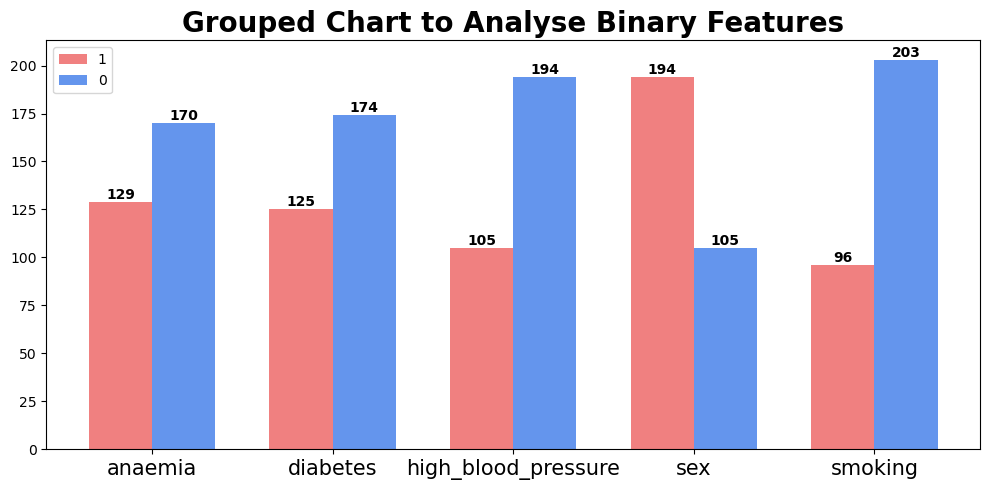

In [11]:
features_list = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
value_ones = [np.count_nonzero(df['anaemia'] == 1), np.count_nonzero(df['diabetes'] == 1),
             np.count_nonzero(df['high_blood_pressure'] == 1), np.count_nonzero(df['sex'] == 1),
             np.count_nonzero(df['smoking'] == 1)]
value_zeros = [np.count_nonzero(df['anaemia'] == 0), np.count_nonzero(df['diabetes'] == 0),
             np.count_nonzero(df['high_blood_pressure'] == 0), np.count_nonzero(df['sex'] == 0),
             np.count_nonzero(df['smoking'] == 0)]

x = np.arange(len(features_list))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5))

bar1 = ax.bar(x - width/2, value_ones, width, label = 1, color = 'lightcoral')
bar2 = ax.bar(x + width/2, value_zeros, width, label = 0, color = 'cornflowerblue')

ax.set_xticks(x, features_list, size = 15)

ax.bar_label(bar1, fontweight = 'bold')
ax.bar_label(bar2, fontweight = 'bold')
ax.set_title("Grouped Chart to Analyse Binary Features", size = 20, weight = 'heavy')
ax.legend()

fig.tight_layout()

plt.show()

##### We will now create a Heatmap to get insights on the relationship between different features on the dataset. Below is an helpful article to create heatmaps.

##### Article - https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

In [12]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


Text(0.5, 1.0, 'Correlation Heatmap')

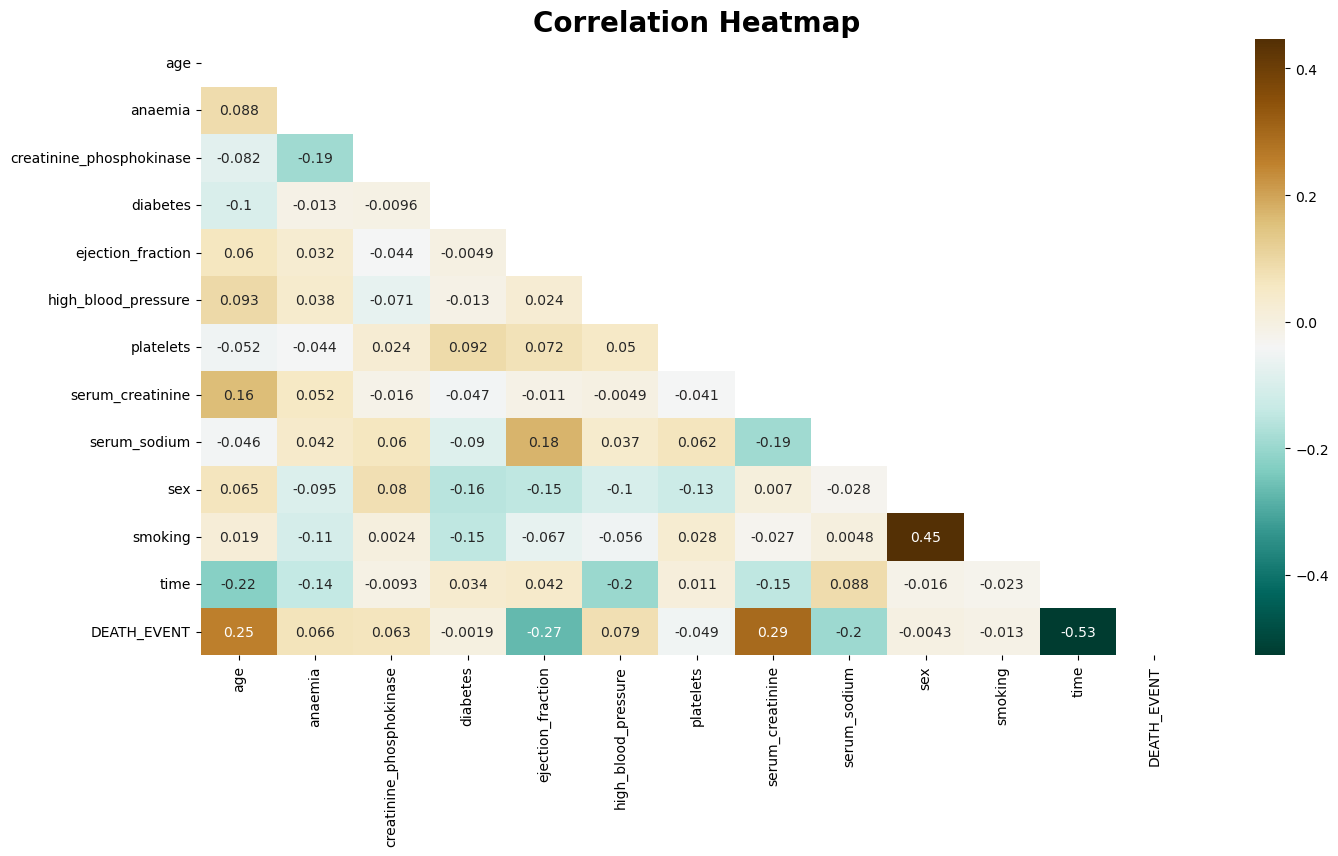

In [13]:
plt.figure(figsize=(16, 8))
mask = np.triu(np.ones_like(df.corr(), dtype = np.bool))
heatmap = sns.heatmap(df.corr(), mask = mask, annot=True, cmap='BrBG_r')
heatmap.set_title("Correlation Heatmap", size = 20, weight = 'heavy')

In [14]:
df.corr()[['DEATH_EVENT']].sort_values(['DEATH_EVENT'], ascending = False)

,DEATH_EVENT
DEATH_EVENT,1.000000
serum_creatinine,0.294278
age,0.253729
high_blood_pressure,0.079351
anaemia,0.066270
creatinine_phosphokinase,0.062728
diabetes,-0.001943
sex,-0.004316
smoking,-0.012623
platelets,-0.049139


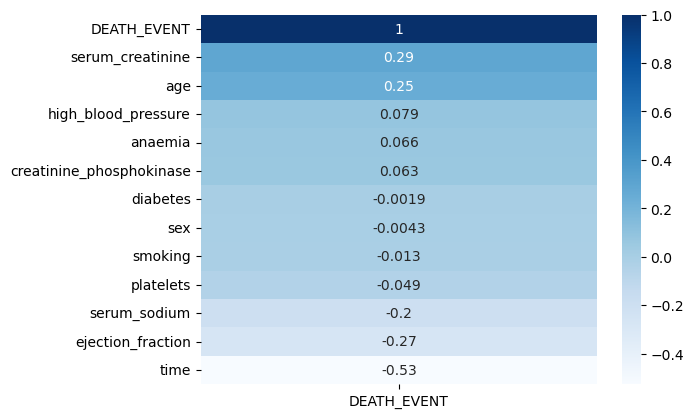

In [15]:
heatmap = sns.heatmap(df.corr()[['DEATH_EVENT']].sort_values('DEATH_EVENT', ascending = False), annot = True, cmap = 'Blues')

#### Let us analyse other features by plotting Histogram

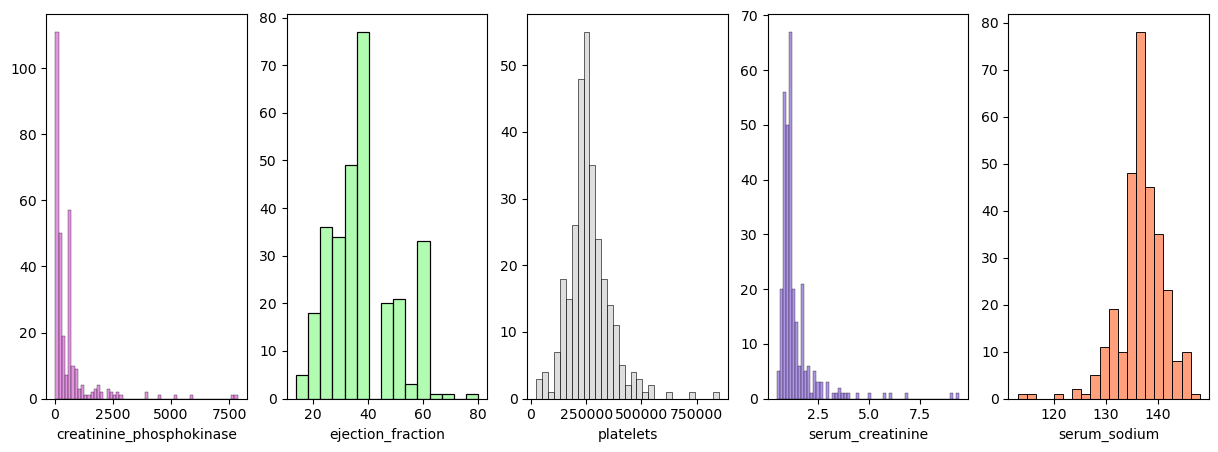

In [16]:
fig, ax = plt.subplots(ncols = 5, figsize=(15,5))

sns.histplot(df['creatinine_phosphokinase'], ax=ax[0], color = 'orchid')
sns.histplot(df['ejection_fraction'], ax=ax[1], color = 'palegreen')
sns.histplot(df['platelets'], ax=ax[2], color = 'lightgray')
sns.histplot(df['serum_creatinine'], ax=ax[3], color = 'mediumpurple')
sns.histplot(df['serum_sodium'], ax=ax[4], color = 'coral')

ax[0].set_ylabel('')
ax[1].set_ylabel('')
ax[2].set_ylabel('')
ax[3].set_ylabel('')
ax[4].set_ylabel('')
plt.show()

I have referred to Matplotlib's documentation to get the available colors to chose from. 
https://matplotlib.org/stable/gallery/color/named_colors.html

## Train test Split

In [17]:
X = df.drop('DEATH_EVENT', axis = 1)
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

# Model Training through different classification Algorithms

## Logistic Regression

In [18]:
log_reg = LogisticRegression()
log_model = log_reg.fit(X_train, y_train)
log_y_pred = log_model.predict(X_test)

In [19]:
log_accuracy = accuracy_score(y_test, log_y_pred)
log_precision = precision_score(y_test, log_y_pred)
log_recall = recall_score(y_test, log_y_pred)
log_f1score = f1_score(y_test, log_y_pred)

print("Accuracy: {} \nPrecision: {} \nRecall:{} \nF1 Score: {}".format(log_accuracy,
                                                                      log_precision,
                                                                      log_recall,
                                                                      log_f1score))

Accuracy: 0.8 
Precision: 0.8823529411764706 
Recall:0.6 
F1 Score: 0.7142857142857143


## K-Nearest neighbors

In [20]:
# I will be checking the accuracy of KNN Model by looping through the number of neighbors

for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn_model = knn.fit(X_train, y_train)
    knn_y_pred = knn_model.predict(X_test)
    print("Accuracy of the KNN Model with {} neighbors is {}".format(i, accuracy_score(y_test, knn_y_pred)))


Accuracy of the KNN Model with 1 neighbors is 0.5333333333333333
Accuracy of the KNN Model with 2 neighbors is 0.5666666666666667
Accuracy of the KNN Model with 3 neighbors is 0.5333333333333333
Accuracy of the KNN Model with 4 neighbors is 0.55
Accuracy of the KNN Model with 5 neighbors is 0.5333333333333333
Accuracy of the KNN Model with 6 neighbors is 0.5333333333333333
Accuracy of the KNN Model with 7 neighbors is 0.5333333333333333
Accuracy of the KNN Model with 8 neighbors is 0.55
Accuracy of the KNN Model with 9 neighbors is 0.55
Accuracy of the KNN Model with 10 neighbors is 0.5333333333333333


In [21]:
# The Maximum Accuracy of the KNN Model is 56.67% with number of Neighbors = 2

knn = KNeighborsClassifier(n_neighbors = 2)
knn_model = knn.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)

In [22]:
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_precision = precision_score(y_test, knn_y_pred)
knn_recall = recall_score(y_test, knn_y_pred)
knn_f1score = f1_score(y_test, knn_y_pred)

print("Accuracy: {} \nPrecision; {} \nRecall: {} \nF1 Score: {}".format(knn_accuracy,
                                                                       knn_precision,
                                                                       knn_recall,
                                                                       knn_f1score))

Accuracy: 0.5666666666666667 
Precision; 0.4 
Recall: 0.08 
F1 Score: 0.13333333333333333


## Support Vector Classifier

In Support Vector Classifiers, we have 4 different Kernels that directly impact the Metrics of the model. So, we will test the SVC model against all these 4 Hyperparameters.

SVC Documentation: https://scikit-learn.org/stable/modules/svm.html#svm-kernels

In [23]:
for k in ('linear', 'poly', 'rbf', 'sigmoid'):
    svc = SVC(kernel=k)
    svc_model = svc.fit(X_train, y_train)
    svc_y_pred = svc_model.predict(X_test)
    print("Accuracy of the SVC Model with {} kernel is {}".format(k, accuracy_score(y_test, svc_y_pred)))

Accuracy of the SVC Model with linear kernel is 0.75
Accuracy of the SVC Model with poly kernel is 0.5833333333333334
Accuracy of the SVC Model with rbf kernel is 0.5833333333333334
Accuracy of the SVC Model with sigmoid kernel is 0.5833333333333334


The highest accuracy of the Support Vector Classifier is with the Linear Kernel.

In [24]:
svc = SVC(kernel='linear')
svc_model = svc.fit(X_train, y_train)
svc_y_pred = svc_model.predict(X_test)

In [25]:
svc_accuracy = accuracy_score(y_test, svc_y_pred)
svc_precision = precision_score(y_test, svc_y_pred)
svc_recall = recall_score(y_test, svc_y_pred)
svc_f1score = f1_score(y_test, svc_y_pred)

print("Accuracy: {} \nPrecision: {} \nRecall: {} \nF1 Score: {}".format(svc_accuracy,
                                                                       svc_precision,
                                                                       svc_recall,
                                                                       svc_f1score))

Accuracy: 0.75 
Precision: 0.8125 
Recall: 0.52 
F1 Score: 0.6341463414634146


## Decision Tree Classifier

Decision Tree Classifiers has different Hyperparameters that can be tuned to get maximum efficiency. We will be looping through different criterion and max_depth for building this model.

Decision Tree Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [26]:
#for i in ('gini', 'entropy'):
for j in range(1, 11):
    dec = DecisionTreeClassifier(max_depth=j)
    dec_model = dec.fit(X_train, y_train)
    dec_y_pred = dec_model.predict(X_test)
    # mean_acc = accuracy_score(y_test, dec_y_pred)
    print("The Maximum Accuracy of the Model with max depth {} is {}".format(j, accuracy_score(y_test, dec_y_pred)))

The Maximum Accuracy of the Model with max depth 1 is 0.75
The Maximum Accuracy of the Model with max depth 2 is 0.6833333333333333
The Maximum Accuracy of the Model with max depth 3 is 0.7166666666666667
The Maximum Accuracy of the Model with max depth 4 is 0.6833333333333333
The Maximum Accuracy of the Model with max depth 5 is 0.75
The Maximum Accuracy of the Model with max depth 6 is 0.7833333333333333
The Maximum Accuracy of the Model with max depth 7 is 0.7166666666666667
The Maximum Accuracy of the Model with max depth 8 is 0.65
The Maximum Accuracy of the Model with max depth 9 is 0.6666666666666666
The Maximum Accuracy of the Model with max depth 10 is 0.7


In [27]:
dec = DecisionTreeClassifier(max_depth=1)
dec_model = dec.fit(X_train, y_train)
dec_y_pred = dec_model.predict(X_test)

In [28]:
dec_accuracy = accuracy_score(y_test, dec_y_pred)
dec_precision = precision_score(y_test, dec_y_pred)
dec_recall = recall_score(y_test, dec_y_pred)
dec_f1score = f1_score(y_test, dec_y_pred)

print("Accuracy: {} \nPrecision: {} \nRecall: {} \nF1 Score: {}".format(dec_accuracy,
                                                                       dec_precision,
                                                                       dec_recall,
                                                                       dec_f1score))

Accuracy: 0.75 
Precision: 0.8125 
Recall: 0.52 
F1 Score: 0.6341463414634146


## Random Forest Algorithm

There are various Hyperparameters in Random Forest that can be tuned to get the best results. We will be using the RandomisedSearchCV from sklearn to compare the Hyperparameters and the model performance. 

I have tuned the hyperparameters by referring to the sklearn documentation and an article on Random Forest Hyperparameter Tuning by Will Koehrsen.

- Random Forest Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- Hyperparameter Tuning the Random Forest in Python: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [29]:
rf = RandomForestClassifier()
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [30]:
# number of trees in forest
n_estimators = [int(i) for i in np.linspace(200, 2000, 10)]

# number of features to consider when looking for the best split
max_features = ['auto', 'sqrt']

# maximum depth of the tree
max_depth = [int(i) for i in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# minimum number of samples required to split an internal node
min_samples_split = [2, 5, 10]

# minimum number of samples required to be at a leaf node
min_samples_leaf = [1, 2, 4]

# method of selecting samples for training
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [31]:
rf_random = RandomizedSearchCV(estimator= rf, param_distributions=random_grid, n_iter = 100)

In [32]:
rf_random.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]})

In [33]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': True}

In [34]:
best_rf = RandomForestClassifier(n_estimators=600, 
                                 min_samples_split=2, 
                                 min_samples_leaf=1, 
                                 max_features='sqrt', 
                                 max_depth=70,
                                bootstrap=True)

rf_model = best_rf.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

In [35]:
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
rf_f1score = f1_score(y_test, rf_y_pred)

print("Accuracy: {} \nPrecision: {} \nRecall: {} \nF1 Score: {}".format(rf_accuracy,
                                                                       rf_precision,
                                                                       rf_recall,
                                                                       rf_f1score))

Accuracy: 0.7333333333333333 
Precision: 0.8461538461538461 
Recall: 0.44 
F1 Score: 0.5789473684210525


#### Now we will create a dictionary to compare all the metrics from each classifiers

In [36]:
accuracy_list = [log_accuracy, knn_accuracy, svc_accuracy, dec_accuracy, rf_accuracy]
precision_list = [log_precision, knn_precision, svc_precision, dec_precision, rf_precision]
recall_list = [log_recall, knn_recall, svc_recall, dec_recall, rf_recall]
f1_list = [log_f1score, knn_f1score, svc_f1score, dec_f1score, rf_f1score]

columns = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

eval_df = pd.DataFrame([accuracy_list, precision_list, recall_list,f1_list], index = columns)
eval_df = eval_df.transpose()
eval_df.rename({0:'Logistic Regression', 1:'K-Nearest Neighbors', 2:'Support Vector Classifier', 3:'Decision Tree', 4:'Random Forest'}, inplace=True)
eval_df = eval_df.round(2)
eval_df

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.80,0.88,0.60,0.71
K-Nearest Neighbors,0.57,0.40,0.08,0.13
Support Vector Classifier,0.75,0.81,0.52,0.63
Decision Tree,0.75,0.81,0.52,0.63
Random Forest,0.73,0.85,0.44,0.58


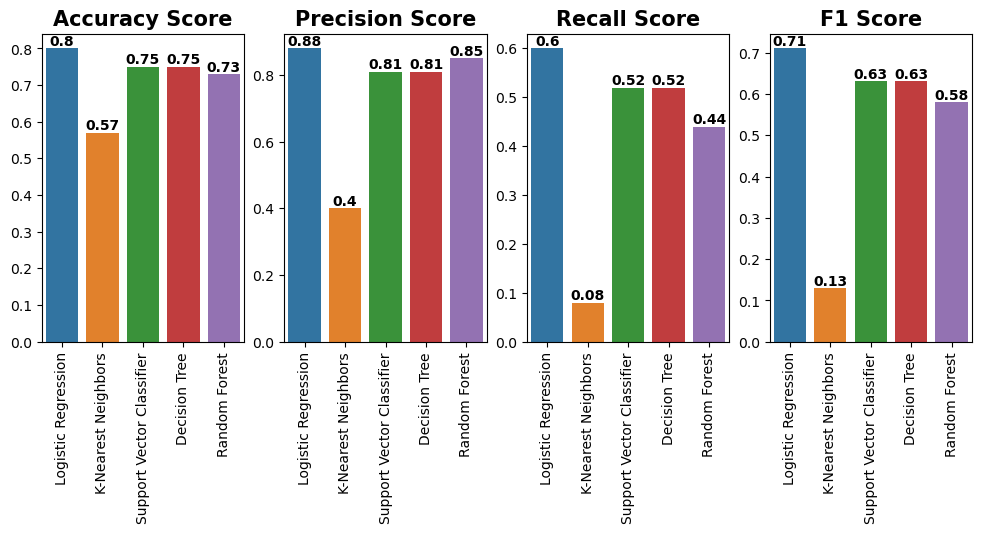

In [37]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize=(12, 4))

sns.barplot(eval_df.index, eval_df.Accuracy,  ax = ax[0])
for i, v in enumerate(eval_df.Accuracy.values):
    ax[0].text(round(i, 2), v, str(v), fontweight='bold', ha='center', va='bottom')

sns.barplot(eval_df.index, eval_df.Precision,  ax = ax[1])
for i, v in enumerate(eval_df.Precision.values):
    ax[1].text(i, v, str(v), fontweight='bold', ha='center', va='bottom')
    
sns.barplot(eval_df.index, eval_df.Recall, ax = ax[2])
for i, v in enumerate(eval_df.Recall.values):
    ax[2].text(i, v, str(v), fontweight='bold', ha='center', va='bottom')
    
sns.barplot(eval_df.index, eval_df['F1 Score'], ax = ax[3])
for i, v in enumerate(eval_df['F1 Score'].values):
    ax[3].text(i, v, str(v), fontweight='bold', ha='center', va='bottom')

ax[0].set_title("Accuracy Score", size=15, weight='heavy')
ax[1].set_title("Precision Score", size=15, weight='heavy')
ax[2].set_title("Recall Score", size=15, weight='heavy')
ax[3].set_title("F1 Score", size=15, weight='heavy')

ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[2].set_xlabel('')
ax[3].set_xlabel('')

ax[0].set_ylabel('')
ax[1].set_ylabel('')
ax[2].set_ylabel('')
ax[3].set_ylabel('')

ax[0].set_xticklabels(eval_df.index, rotation = 90)
ax[1].set_xticklabels(eval_df.index, rotation = 90)
ax[2].set_xticklabels(eval_df.index, rotation = 90)
ax[3].set_xticklabels(eval_df.index, rotation = 90)

plt.show()

### Looking at the bar graphs above, we can clearly see that the Logisitic Regression Algorithm does a better job in all the metrics as compared to all the other classifiers. 